In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

raw_df = pd.read_csv('./testtest.csv')


def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7 )

#역정규화 : 정규화된 값을 원래의 값으로 되돌림
def reverse_min_max_scaling(org_x, x): #종가 예측값
    org_x_np = np.asarray(org_x) 
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = list(raw_df.columns)
del columns[0]
scale_cols = list(columns)

# scaled_df = scaler.fit_transform(raw_df[scale_cols])
scaled_df = min_max_scaling(raw_df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list)

# feature_cols = columns[0:5]
feature_cols = columns[0:2]
label_cols = columns[0:2]

# feature_cols=columns[0:len(columns)]
# label_cols=columns[0:len(columns)]

print(feature_cols)
print(label_cols)

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

window_size = 120

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

split = -24

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

model = Sequential()

model.add(LSTM(1, activation='tanh', input_shape=x_train[0].shape))

model.add(Dense(2, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=100, batch_size=16,
          callbacks=[early_stop])

['1_정릉북한산국립공원입구', '2_정릉산장아파트']
['1_정릉북한산국립공원입구', '2_정릉산장아파트']
(336, 2) (336, 2)
(216, 120, 2) (216, 2)
Epoch 1/100
12/12 [==============================] - 4s 90ms/step - loss: 1.0167 - mae: 0.8682 - val_loss: 0.9905 - val_mae: 0.8531
Epoch 2/100
12/12 [==============================] - 0s 32ms/step - loss: 0.9690 - mae: 0.8405 - val_loss: 0.9440 - val_mae: 0.8257
Epoch 3/100
12/12 [==============================] - 0s 32ms/step - loss: 0.9235 - mae: 0.8133 - val_loss: 0.8996 - val_mae: 0.7988
Epoch 4/100
12/12 [==============================] - 0s 34ms/step - loss: 0.8802 - mae: 0.7868 - val_loss: 0.8576 - val_mae: 0.7727
Epoch 5/100
12/12 [==============================] - 0s 35ms/step - loss: 0.8392 - mae: 0.7610 - val_loss: 0.8178 - val_mae: 0.7473
Epoch 6/100
12/12 [==============================] - 0s 31ms/step - loss: 0.8004 - mae: 0.7360 - val_loss: 0.7801 - val_mae: 0.7227
Epoch 7/100
12/12 [==============================] - 0s 33ms/step - loss: 0.7636 - mae: 0.7117 - val_loss

Epoch 62/100
12/12 [==============================] - 0s 36ms/step - loss: 0.0260 - mae: 0.1332 - val_loss: 0.0247 - val_mae: 0.1296
Epoch 63/100
12/12 [==============================] - 0s 42ms/step - loss: 0.0237 - mae: 0.1266 - val_loss: 0.0225 - val_mae: 0.1231
Epoch 64/100
12/12 [==============================] - 1s 44ms/step - loss: 0.0216 - mae: 0.1202 - val_loss: 0.0205 - val_mae: 0.1169
Epoch 65/100
12/12 [==============================] - 0s 40ms/step - loss: 0.0196 - mae: 0.1141 - val_loss: 0.0186 - val_mae: 0.1109
Epoch 66/100
12/12 [==============================] - 0s 34ms/step - loss: 0.0178 - mae: 0.1083 - val_loss: 0.0169 - val_mae: 0.1052
Epoch 67/100
12/12 [==============================] - 0s 34ms/step - loss: 0.0162 - mae: 0.1027 - val_loss: 0.0153 - val_mae: 0.0998
Epoch 68/100
12/12 [==============================] - 0s 34ms/step - loss: 0.0147 - mae: 0.0974 - val_loss: 0.0139 - val_mae: 0.0946
Epoch 69/100
12/12 [==============================] - 0s 31ms/step - 

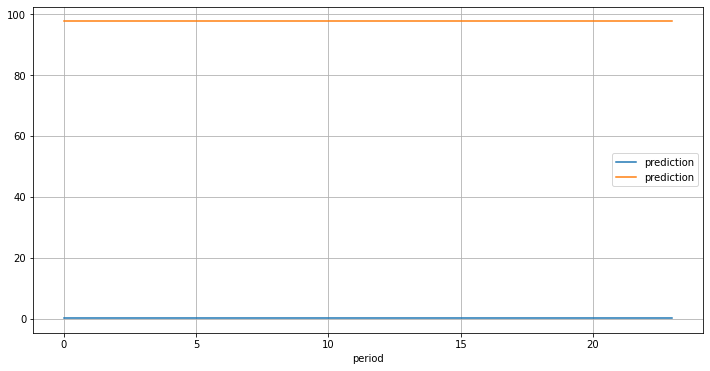

In [21]:
pred = model.predict(x_test)

def reverse_min_max_scaling(org_x, x): #종가 예측값
    org_x_np = np.asarray(org_x) 
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

result = reverse_min_max_scaling(raw_df[scale_cols], pred)


plt.figure(figsize=(12, 6))
plt.xlabel('period')
plt.plot(result, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

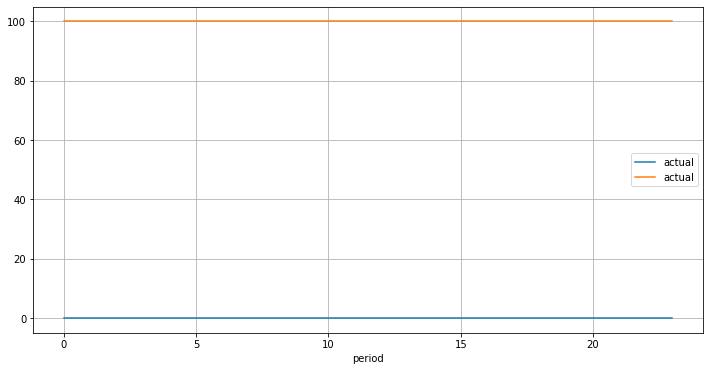

In [22]:
pred = model.predict(x_test)

def reverse_min_max_scaling(org_x, x): #종가 예측값
    org_x_np = np.asarray(org_x) 
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

result = reverse_min_max_scaling(raw_df[scale_cols], y_test)


plt.figure(figsize=(12, 6))
plt.xlabel('period')
plt.plot(result, label='actual')
plt.grid()
plt.legend(loc='best')

plt.show()

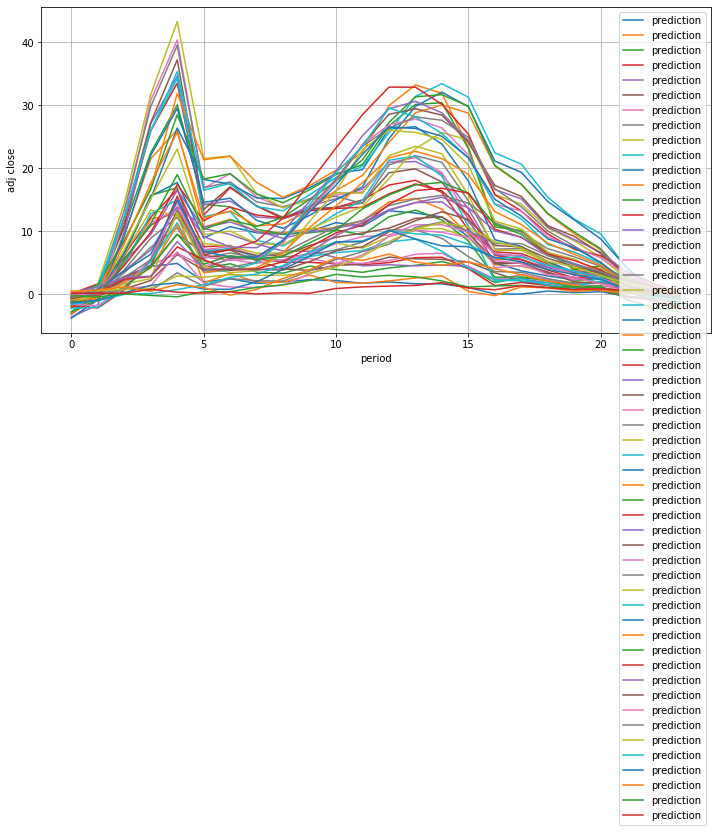

In [40]:
#역정규화 : 정규화된 값을 원래의 값으로 되돌림
def reverse_min_max_scaling(org_x, x): #종가 예측값
    org_x_np = np.asarray(org_x) 
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

result = reverse_min_max_scaling(raw_df[scale_cols], pred)

plt.figure(figsize=(12, 6))
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(result, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

[[0. 1. 1. ... 0. 0. 0.]
 [2. 3. 0. ... 1. 0. 0.]
 [1. 3. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


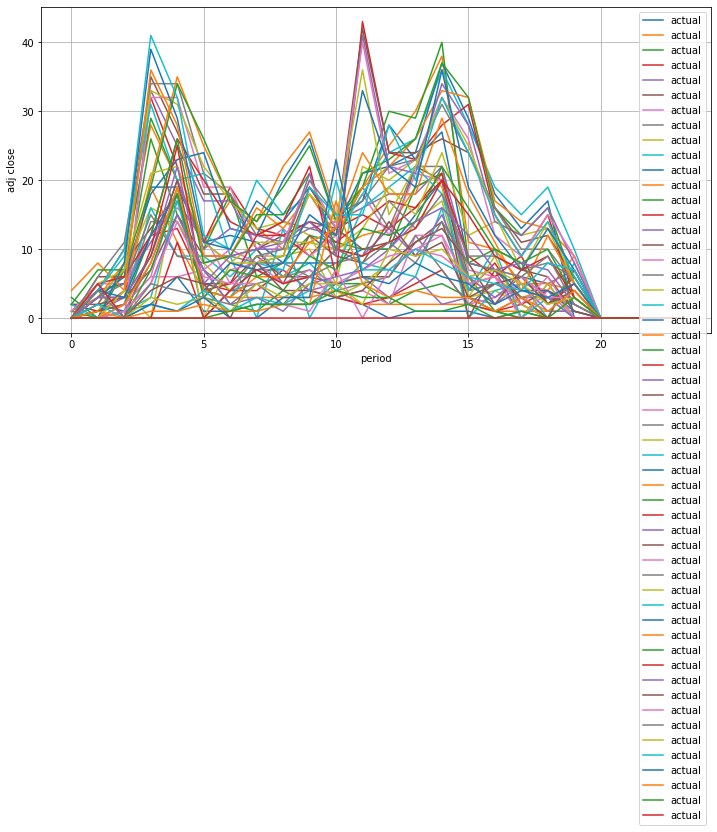

In [41]:
#역정규화 : 정규화된 값을 원래의 값으로 되돌림
def reverse_min_max_scaling(org_x, x): #종가 예측값
    org_x_np = np.asarray(org_x) 
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

result = reverse_min_max_scaling(raw_df[scale_cols], y_test)
print(result)
plt.figure(figsize=(12, 6))
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(result, label='actual')
plt.grid()
plt.legend(loc='best')

plt.show()